# Сбор данных по источникам коэффициента CAPE 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Сбор-данных-по-CAPE" data-toc-modified-id="Сбор-данных-по-CAPE-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Сбор данных по CAPE</a></span><ul class="toc-item"><li><span><a href="#Данные-с--Barclays" data-toc-modified-id="Данные-с--Barclays-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Данные с  Barclays</a></span></li><li><span><a href="#Данные-с--Researchaffiliates" data-toc-modified-id="Данные-с--Researchaffiliates-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Данные с  Researchaffiliates</a></span></li><li><span><a href="#Объединение-данных-по-CAPE" data-toc-modified-id="Объединение-данных-по-CAPE-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Объединение данных по CAPE</a></span></li></ul></li><li><span><a href="#Сбор-тикеров-ETF" data-toc-modified-id="Сбор-тикеров-ETF-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Сбор тикеров ETF</a></span></li><li><span><a href="#Сбор-данных-по-коэфциенту-P/B" data-toc-modified-id="Сбор-данных-по-коэфциенту-P/B-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сбор данных по коэфциенту P/B</a></span></li><li><span><a href="#Расчет-долей-портфеля" data-toc-modified-id="Расчет-долей-портфеля-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчет долей портфеля</a></span></li><li><span><a href="#Экспорт-данных-в-google-drive" data-toc-modified-id="Экспорт-данных-в-google-drive-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Экспорт данных в google drive</a></span></li></ul></div>

In [4]:
# подключение библиотек:
import pandas as pd # работа с таблицами
import numpy as np # работа с таблицами
import datetime # работа с датами
import requests # http запросы
from bs4 import BeautifulSoup
import gspread  # работа с google таблицами 
from gspread_dataframe import set_with_dataframe
import time
from selenium import webdriver
import math
import matplotlib.pyplot as plt

## Сбор данных по CAPE

### Данные с  Barclays


In [5]:
barclays_url = 'https://indices.barclays/file.app?action=shared&path=shiller/cape.csv' # ссылка на файл с CAPE

In [6]:
barclays_data =  pd.read_csv(barclays_url, sep=",") # сохраним файл в датафрейм для последующей обработки
barclays_data # вывод данных

,Date,Australia,Brazil,Canada,China,Europe,France,Germany,Hong Kong,Italy,...,Russia,Singapore,South Africa,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA
0,31/12/1981,12.39,0.00,10.71,0.00,9.02,0.00,9.63,31.22,0.00,...,0.00,33.70,0.00,0.00,11.14,9.20,0.00,0.00,8.84,9.35
1,29/01/1982,11.14,0.00,9.70,0.00,9.24,0.00,9.76,31.91,0.00,...,0.00,33.20,0.00,0.00,11.09,9.06,0.00,0.00,9.28,9.20
2,26/02/1982,10.01,0.00,9.08,0.00,9.12,0.00,9.85,27.17,0.00,...,0.00,30.33,0.00,0.00,10.78,8.80,0.00,0.00,8.77,8.72
3,31/03/1982,9.50,0.00,8.52,0.00,8.97,0.00,10.13,24.11,0.00,...,0.00,28.73,0.00,0.00,9.97,8.79,0.00,0.00,8.92,8.53
4,30/04/1982,10.57,0.00,8.28,0.00,9.14,0.00,10.12,25.61,0.00,...,0.00,29.84,0.00,0.00,9.44,8.86,0.00,0.00,9.02,8.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,31/03/2021,22.50,20.77,24.56,19.46,22.88,25.69,22.22,19.23,23.16,...,10.35,16.42,20.37,16.58,26.44,29.23,32.51,7.75,16.33,36.80
472,30/04/2021,23.12,21.39,25.45,19.50,23.45,26.77,22.55,19.54,23.99,...,10.00,16.55,19.79,17.36,26.74,29.34,34.38,7.83,16.95,38.25
473,31/05/2021,23.64,21.58,25.61,19.47,23.63,27.23,22.47,20.10,24.75,...,10.52,16.60,20.00,17.73,25.39,30.02,32.47,7.88,17.10,37.67
474,30/06/2021,24.01,21.66,25.99,19.61,23.90,27.36,22.74,19.74,24.84,...,10.60,16.43,19.15,17.06,25.34,31.35,32.32,7.70,17.08,38.46


In [7]:
barclays_data_len = len(barclays_data) # посчитаем количество строк

In [8]:
barclays_last_string = barclays_data[barclays_data_len - 1:] # возьмем последнюю строку (актуальные данные)
barclays_last_string

,Date,Australia,Brazil,Canada,China,Europe,France,Germany,Hong Kong,Italy,...,Russia,Singapore,South Africa,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA
475,30/07/2021,24.24,20.59,26.38,16.91,24.23,28.14,22.72,19.44,26.67,...,10.69,16.83,18.87,17.23,26.2,31.33,31.3,7.8,17.1,38.62


In [9]:
barclays_date = barclays_last_string['Date'].values[0] # сохраним дату крайнего исследования

In [10]:
barclays_result = barclays_last_string.T # транспонируем строку
barclays_result.head() # выведем первые 5 строк из того что получилось

,475
Date,30/07/2021
Australia,24.24
Brazil,20.59
Canada,26.38
China,16.91


In [11]:
barclays_result.reset_index(inplace=True) # обновим таблицу, чтобы индексами таблицы были целые числа, а не названия стран
barclays_result

,index,475
0,Date,30/07/2021
1,Australia,24.24
2,Brazil,20.59
3,Canada,26.38
4,China,16.91
5,Europe,24.23
6,France,28.14
7,Germany,22.72
8,Hong Kong,19.44
9,Italy,26.67


In [12]:
barclays_result = barclays_result.drop(barclays_result.index[[0]]) # удалим нулевую строку, которая содержит дату
barclays_result

,index,475
1,Australia,24.24
2,Brazil,20.59
3,Canada,26.38
4,China,16.91
5,Europe,24.23
6,France,28.14
7,Germany,22.72
8,Hong Kong,19.44
9,Italy,26.67
10,India,31.56


In [13]:
barclays_column_name = 'Barclays CAPE ' + barclays_date # создаем название для столбца
barclays_result.set_axis (['country', barclays_column_name], axis=1, inplace=True) # заменяем названия столбцов
barclays_result

,country,Barclays CAPE 30/07/2021
1,Australia,24.24
2,Brazil,20.59
3,Canada,26.38
4,China,16.91
5,Europe,24.23
6,France,28.14
7,Germany,22.72
8,Hong Kong,19.44
9,Italy,26.67
10,India,31.56


Поменяем UK на United Kingdom

In [14]:
barclays_result['country'] = barclays_result['country'].apply(lambda x : x if x != 'UK' else 'United Kingdom')

In [15]:
barclays_result['country'] = barclays_result['country'].apply(lambda x : x if x != 'USA' else 'US Large')

In [16]:
barclays_result['country'] = barclays_result['country'].apply(lambda x : x if x != 'Korea' else 'South Korea')

### Данные с  Researchaffiliates



In [17]:
# функция переводит дату в формат url
def date_to_url_format(date, eu_format=False):
  delimeter = '%2F' # разделитель дат в url запросах

  if eu_format: # от этого параметра меняется порядок дня и месяца
    return date.strftime("%d") +  delimeter  + date.strftime("%m") + delimeter + date.strftime("%Y")

  return date.strftime("%m") +  delimeter  + date.strftime("%d") + delimeter + date.strftime("%Y")

Найдем дату исследования

In [18]:
data_date_str = ''

try:
    driver = webdriver.Firefox(
        executable_path=r'C:\Users\User\AppData\Local\python\geckodriver.exe'
    )
    driver.get('https://interactive.researchaffiliates.com/asset-allocation#!/?currency=USD&email=undefined&expanded=tertiary&group=core&model=ER&models=ER&scale=LINEAR&terms=REAL&tertiary=shiller-pe-cape-ratio-box&type=Equities')
    
    time.sleep(5)

    soup                = BeautifulSoup(driver.page_source, "lxml")
    date_div = soup.find('div',attrs={'class': 'settings-toolbar__asof'})
    # price_book_selector = '#fundPortfolioData > section > div:nth-child(4) > span'
    # data                = soup.select(price_book_selector)        
    data_date_str = date_div.text.strip()[-10:]
    print(data_date_str)

except Exception as ex:
    print(ex)
finally:
    driver.close()
    driver.quit()

06/30/2021


Подготовим переменные, которые требуются в запросе к Researchaffiliates

In [19]:
one_day         = datetime.timedelta(days=1) # сдвиг на один день
today           = datetime.date.today() # сегодня
first_day_month = today.replace(day=1) # первый день текущего месяца
#last_month      = first_day_month - one_day # последний день предыдущего месяца

researchaffiliates_URL_start = 'https://download.researchaffiliates.com/download/asset-allocation/excel?webAccountId=36b8786b-0fef-491f-a785-4fe24574fd5d&currency=USD&terms=REAL&model=ER'


date_str = 'Fri, 24 Apr 2021 16:22:54 +0000'
research_date_raw =  datetime.datetime.strptime(data_date_str, '%m/%d/%Y')

research_date   = '&dataDate=' + date_to_url_format(research_date_raw)

#research_date   = '&dataDate=05%2F31%2F2021'
try_run = 0


print('Параметр "дата исследования"', research_date)

Параметр "дата исследования" &dataDate=06%2F30%2F2021


In [20]:
researchaffiliates_URL = ''
# ищем правильный URL методом перебора

for try_run in range(0, 95): # диапазон дат - от начала до 95 дней вперед

   #run_url  = '&runDate=' + date_to_url_format(today - one_day * try_run) # ставим очередную дату в URL
   run_url  = '&runDate=' + date_to_url_format(research_date_raw + one_day * try_run) # ставим очередную дату в URL
   test_URL = researchaffiliates_URL_start + research_date + run_url # собираем URL 
   resp     = requests.get(test_URL) # запрос по URL

   if resp.status_code == 200: # Если файл с отчетом нашёлся
     researchaffiliates_URL = test_URL # сохраняем URL 
     break

if researchaffiliates_URL == '':
   print('Правильный URL для Researchaffiliates не найден') 

researchaffiliates_URL

'https://download.researchaffiliates.com/download/asset-allocation/excel?webAccountId=36b8786b-0fef-491f-a785-4fe24574fd5d&currency=USD&terms=REAL&model=ER&dataDate=06%2F30%2F2021&runDate=07%2F02%2F2021'

Делаем запрос к Researchaffiliates с подобранными параметрами

In [21]:
# скачиваем Excel файл, выбираем страницу Shiller.PE
researchaffiliates_data =  pd.read_excel(researchaffiliates_URL, sheet_name='Shiller.PE')
researchaffiliates_data

,Unnamed: 0,Asset Allocation Interactive,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,NaN,Shiller P/E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Market,Index,EPS Inception Date,Current,Current Percentage,Max,3rd Quartile,Median,1st Quartile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,All country,MSCI ACWI,1995,26.326198,0.897368,29.377534,22.074717,18.822407,17.263784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Asia Ex-Japan,MSCI Asia Ex-Japan,1995,18.743878,0.65,37.252188,20.677677,17.307721,15.437328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Australia,MSCI Australia,1969,20.053915,0.794589,30.405037,19.204194,16.564531,14.568523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Brazil,MSCI Brazil,1994,19.18326,0.830049,28.493432,17.907729,14.729206,10.95224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Canada,MSCI Canada,1969,22.943676,0.690381,60.37111,26.604285,19.462277,15.222865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,China,MSCI China,1995,17.296537,0.637566,47.517787,22.367537,16.253657,13.911754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,EAFE,MSCI EAFE,1972,19.195585,0.420086,39.755935,27.818207,23.634701,15.743804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Заготовим переменные, в которые потом положим адреса необходимых колонок и ячеек

In [22]:
market_column = '' # сюда потом сохраним название колонки "рынок страны"
index_column  = '' # сюда потом сохраним название колонки индекса, который предлагает Research Affiliates
cape_column   = '' # сюда потом сохраним название колонки с CAPE
start_string  = 0  # сюда потом сохраним номер строки, с которой начинаются данные (заголовки строк не учитываем)

In [23]:
# пройдем в цикле по всем колонкам таблицы
for column in researchaffiliates_data.columns:
  
  market_in_column = len(researchaffiliates_data[researchaffiliates_data[column] =='Market'].index.values)
  if market_in_column: # если ячейка в колонке содержит слово Market    
    market_column = column # значит, это колонка с названием страны
    start_string = researchaffiliates_data[researchaffiliates_data[column] =='Market'].index[0] + 1 # со следующей ячейки начинаются данные

  index_in_column = len(researchaffiliates_data[researchaffiliates_data[column] =='Index'].index.values)
  if index_in_column: # если ячейка в колонке содержит слово Index    
    index_column = column # значит, это колонка с названием индекса
  
  cape_in_column = len(researchaffiliates_data[researchaffiliates_data[column] =='Current'].index.values)
  if cape_in_column:  # если ячейка в колонке содержит слово Current 
    cape_column = column # значит, это колонка с CAPE
  

In [24]:
researchaffiliates_result = researchaffiliates_data.loc[start_string:, [market_column, index_column, cape_column]] # вырежем из таблицы необходимые данные
researchaffiliates_result

,Asset Allocation Interactive,Unnamed: 2,Unnamed: 4
3,All country,MSCI ACWI,26.326198
4,Asia Ex-Japan,MSCI Asia Ex-Japan,18.743878
5,Australia,MSCI Australia,20.053915
6,Brazil,MSCI Brazil,19.18326
7,Canada,MSCI Canada,22.943676
8,China,MSCI China,17.296537
9,EAFE,MSCI EAFE,19.195585
10,Emerging Markets,MSCI EM,16.60841
11,Europe,MSCI Europe,19.330136
12,France,MSCI France,24.047382


In [25]:
researchaffiliates_result.set_axis(['country', 'RA_Index', 'RA_CAPE'], axis=1, inplace=True) # переименуем названия колонок

In [26]:
researchaffiliates_result.dropna(subset = ['RA_CAPE'], inplace = True) # Удаляем строки, если в них не заполнен CAPE

In [27]:
researchaffiliates_result

,country,RA_Index,RA_CAPE
3,All country,MSCI ACWI,26.326198
4,Asia Ex-Japan,MSCI Asia Ex-Japan,18.743878
5,Australia,MSCI Australia,20.053915
6,Brazil,MSCI Brazil,19.18326
7,Canada,MSCI Canada,22.943676
8,China,MSCI China,17.296537
9,EAFE,MSCI EAFE,19.195585
10,Emerging Markets,MSCI EM,16.60841
11,Europe,MSCI Europe,19.330136
12,France,MSCI France,24.047382


In [28]:
researchaffiliates_result['RA_CAPE'] = researchaffiliates_result['RA_CAPE'].astype('float') # преобразуем данные по CAPE из строки в число
researchaffiliates_result = researchaffiliates_result.round(2) # округлим до двух знаков после запятой

### Объединение данных по CAPE

Объеденим данные с источников по колонке 'country'. Тип объединения outer - сохранение данных с всех таблиц (если в одной из таблиц нет данных по стране, то получим пустую ячейку).

In [29]:
final_data = barclays_result.merge(researchaffiliates_result, on='country', how='outer')
final_data

,country,Barclays CAPE 30/07/2021,RA_Index,RA_CAPE
0,Australia,24.24,MSCI Australia,20.05
1,Brazil,20.59,MSCI Brazil,19.18
2,Canada,26.38,MSCI Canada,22.94
3,China,16.91,MSCI China,17.30
4,Europe,24.23,MSCI Europe,19.33
5,France,28.14,MSCI France,24.05
6,Germany,22.72,MSCI Germany,18.58
7,Hong Kong,19.44,MSCI Hong Kong,16.90
8,Italy,26.67,MSCI Italy,20.48
9,India,31.56,MSCI India,28.42


In [30]:
# final_data.to_excel('result.xlsx') # сохраним полученные данные в файл
# files.download('result.xlsx') # скачаем файл

## Сбор тикеров ETF

In [31]:
USA_index = final_data.query('country =="US Large"').index[0] # запомним номер USA

In [32]:
final_data.loc[USA_index, 'country'] = 'U.S.' # поменяем название как на сайте ETFdb
final_data

,country,Barclays CAPE 30/07/2021,RA_Index,RA_CAPE
0,Australia,24.24,MSCI Australia,20.05
1,Brazil,20.59,MSCI Brazil,19.18
2,Canada,26.38,MSCI Canada,22.94
3,China,16.91,MSCI China,17.30
4,Europe,24.23,MSCI Europe,19.33
5,France,28.14,MSCI France,24.05
6,Germany,22.72,MSCI Germany,18.58
7,Hong Kong,19.44,MSCI Hong Kong,16.90
8,Italy,26.67,MSCI Italy,20.48
9,India,31.56,MSCI India,28.42


In [33]:
countries = final_data['country'].tolist()
countries

['Australia',
 'Brazil',
 'Canada',
 'China',
 'Europe',
 'France',
 'Germany',
 'Hong Kong',
 'Italy',
 'India',
 'Israel',
 'Japan',
 'South Korea',
 'Mexico',
 'Netherlands',
 'Poland',
 'Russia',
 'Singapore',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Turkey',
 'United Kingdom',
 'U.S.',
 'All country',
 'Asia Ex-Japan',
 'EAFE',
 'Emerging Markets',
 'Global Developed',
 'Indonesia',
 'Malaysia',
 'Thailand',
 'US Small']

In [34]:
countries_string = '"' + '", "'.join(countries) + '"'
countries_string

'"Australia", "Brazil", "Canada", "China", "Europe", "France", "Germany", "Hong Kong", "Italy", "India", "Israel", "Japan", "South Korea", "Mexico", "Netherlands", "Poland", "Russia", "Singapore", "South Africa", "Spain", "Sweden", "Switzerland", "Taiwan", "Turkey", "United Kingdom", "U.S.", "All country", "Asia Ex-Japan", "EAFE", "Emerging Markets", "Global Developed", "Indonesia", "Malaysia", "Thailand", "US Small"'

Соберем все ETF стран, по которым есть информация по CAPE

In [35]:
etf_URL = 'https://etfdb.com/api/screener/'

#data = '{"sort_by":"average_volume","sort_direction":"desc","page":1,"asset_class":"equity","regions":["Egypt" , "Nigeria", "jopasrukoi", "Israel"],"active_or_passive":"Passive","structure":["ETF"],"only":["meta","data","count"]}'
data_start = '{"sort_by":"average_volume","per_page":999,"sort_direction":"desc","page":1,"asset_class":"equity","regions":['
data_end = '],"active_or_passive":"Passive","structure":["ETF"],"only":["meta","data","count"]}'
data = data_start + countries_string + data_end

response  = requests.post(etf_URL, data= data).json()

Разложим данные по спискам

In [37]:
etf_tickers = []
etf_names  =  []
etf_assets =  []

for etf in response['data']:
  etf_tickers.append(etf['symbol']['text'] )
  etf_names.append(etf['name']['text'] )
  
  assets = etf['assets']
  assets = assets.replace("$", "")
  assets = assets.replace(",", "")
  etf_assets.append( assets)


Создадим датафрейм с информацией о ETF

In [38]:
 pd.options.display.max_rows = 250
 tickers_data = pd.DataFrame(list(zip(etf_tickers, etf_names, etf_assets)), columns =['ticker', 'name', 'assets($M)'])
 tickers_data

,ticker,name,assets($M)
0,SQQQ,ProShares UltraPro Short QQQ,1632.12
1,XLF,Financial Select Sector SPDR Fund,39334.90
2,EEM,iShares MSCI Emerging Markets ETF,30331.10
3,TQQQ,ProShares UltraPro QQQ,13530.30
4,XLE,Energy Select Sector SPDR Fund,22864.50
...,...,...,...
994,TENG,Direxion Daily 5G Communications Bull 2X Shares,8.69
995,LGBT,LGBTQ + ESG100 ETF,4.01
996,FSST,Fidelity Sustainability U.S. Equity ETF,3.12
997,DSPC,De-Spac ETF,2.42


In [39]:
tickers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ticker      999 non-null    object
 1   name        999 non-null    object
 2   assets($M)  999 non-null    object
dtypes: object(3)
memory usage: 23.5+ KB


Уберем из списка ETF отраслевые, с плечом, активные, шорты и т.д. 

In [41]:
banned_words = ['tech', '2x', '3x', '4x', '5x',  'divid',  '5g', 'health', 'energ', 'material', 'pharm', 'utilit', 'short', 'innov']


def ban_etf(name):
  for bann_word in banned_words:
    if bann_word in name.lower():
      return True
  
  return False


tickers_data['banned'] = tickers_data['name'].apply(ban_etf)

Посмотрим, например, Израиль - все ли отраслевые ETF забанили

In [42]:
tickers_data[tickers_data.name.str.contains("Israel") == True]

,ticker,name,assets($M),banned
351,IZRL,ARK Israel Innovative Technology ETF,283.72,True
463,ITEQ,BlueStar Israel Technology ETF,207.99,True
604,EIS,iShares MSCI Israel ETF,159.72,False
860,ISRA,VanEck Vectors Israel ETF,85.29,False


Оставим только индексные страновые ETF

In [43]:
tickers_data = tickers_data.query('banned == False')

In [44]:
tickers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 1 to 998
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ticker      733 non-null    object
 1   name        733 non-null    object
 2   assets($M)  733 non-null    object
 3   banned      733 non-null    bool  
dtypes: bool(1), object(3)
memory usage: 23.6+ KB


In [45]:
tickers_data.dropna(subset =['assets($M)'], inplace = True) # убираем тикеры без данных об активах
len(tickers_data)

<ipython-input-45-5425a6d34787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickers_data.dropna(subset =['assets($M)'], inplace = True) # убираем тикеры без данных об активах


733

In [46]:
#pd.options.display.max_rows = 800
tickers_data.sort_values(by='assets($M)')

,ticker,name,assets($M),banned
988,QQQA,ProShares Nasdaq-100 Dorsey Wright Momentum ETF,0.02,False
975,HEWW,iShares Currency Hedged MSCI Mexico ETF,0.72,False
852,SMDY,Syntax Stratified MidCap ETF,10.04,False
930,USLB,Invesco Russell 1000 Low Beta Equal Weight ETF,10.06,False
795,AUGZ,TrueShares Structured Outcome (August) ETF,10.30,False
...,...,...,...,...
688,SSPY,Syntax Stratified LargeCap ETF,98.91,False
564,QUS,SPDR MSCI USA StrategicFactors ETF,982.71,False
364,NUSC,Nuveen ESG Small-Cap ETF,988.20,False
20,IEFA,iShares Core MSCI EAFE ETF,99091.50,False


Убираем текстовые значения 'N/A'

In [47]:
tickers_data['assets($M)'] = tickers_data['assets($M)'].apply(lambda x: 0 if x=='N/A' else x)

<ipython-input-47-17d9f13dd82d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickers_data['assets($M)'] = tickers_data['assets($M)'].apply(lambda x: 0 if x=='N/A' else x)


Меняем тип текст на float

In [48]:
tickers_data['assets($M)'] = tickers_data['assets($M)'].astype('float')
tickers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 1 to 998
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      733 non-null    object 
 1   name        733 non-null    object 
 2   assets($M)  733 non-null    float64
 3   banned      733 non-null    bool   
dtypes: bool(1), float64(1), object(2)
memory usage: 23.6+ KB


<ipython-input-48-09b663f5c507>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickers_data['assets($M)'] = tickers_data['assets($M)'].astype('float')


Функция ищет страну в названии ETF

In [49]:
def get_country(name):
  for country in countries:
    if country.lower() in name.lower():
      return country
  return ''

tickers_data['country'] = tickers_data['name'].apply(get_country)

<ipython-input-49-a5a18c2780d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickers_data['country'] = tickers_data['name'].apply(get_country)


In [50]:
tickers_data.sort_values(by=[ 'country', 'assets($M)'])

,ticker,name,assets($M),banned,country
988,QQQA,ProShares Nasdaq-100 Dorsey Wright Momentum ETF,0.02,False,
977,PEXL,Pacer US Export Leaders ETF,2.15,False,
925,SKYU,ProShares Ultra Nasdaq Cloud Computing ETF,2.28,False,
997,DSPC,De-Spac ETF,2.42,False,
929,LTL,ProShares Ultra Telecommunications,2.51,False,
...,...,...,...,...,...
950,HEWU,iShares Currency Hedged MSCI United Kingdom ETF,8.12,False,United Kingdom
808,FKU,First Trust United Kingdom AlphaDEX Fund,28.61,False,United Kingdom
587,EWUS,iShares MSCI United Kingdom Small-Cap ETF,125.18,False,United Kingdom
520,FLGB,Franklin FTSE United Kingdom ETF,233.10,False,United Kingdom


Приводим названия тикеров по США к формату 'U.S.'

In [51]:
def sp500_to_us(row):
  if 'S\u0026P 500' in row['name']:
    return 'U.S.'

  if 'S&P 500' in row['name']:
    return 'U.S.'

  return row['country']

tickers_data['country'] = tickers_data.apply(sp500_to_us, axis=1)
tickers_data.sort_values(by='assets($M)', ascending=False)

<ipython-input-51-168c0b68f0bb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickers_data['country'] = tickers_data.apply(sp500_to_us, axis=1)


,ticker,name,assets($M),banned,country
38,IVV,iShares Core S&P 500 ETF,294885.00,False,U.S.
49,VTI,Vanguard Total Stock Market ETF,260413.00,False,
44,VOO,Vanguard S&P 500 ETF,243683.00,False,U.S.
21,VEA,Vanguard FTSE Developed Markets ETF,103425.00,False,
20,IEFA,iShares Core MSCI EAFE ETF,99091.50,False,EAFE
...,...,...,...,...,...
997,DSPC,De-Spac ETF,2.42,False,
925,SKYU,ProShares Ultra Nasdaq Cloud Computing ETF,2.28,False,
977,PEXL,Pacer US Export Leaders ETF,2.15,False,
975,HEWW,iShares Currency Hedged MSCI Mexico ETF,0.72,False,Mexico


Сделаем выборку ETF с самым большим числом активов по каждой стране

In [79]:
high_assets = tickers_data.sort_values(by='assets($M)', ascending=False).groupby('country').first().reset_index()
high_assets = high_assets.drop('banned', 1)
high_assets

,country,ticker,name,assets($M)
0,,VTI,Vanguard Total Stock Market ETF,260413.00
1,Australia,EWA,iShares MSCI-Australia ETF,1527.08
2,Brazil,EWZ,iShares MSCI Brazil ETF,5705.39
3,Canada,BBCA,JPMorgan BetaBuilders Canada ETF,5630.18
4,China,MCHI,iShares MSCI China ETF,6194.19
5,EAFE,IEFA,iShares Core MSCI EAFE ETF,99091.50
6,Emerging Markets,VWO,Vanguard FTSE Emerging Markets ETF,79293.10
7,Europe,VGK,Vanguard FTSE Europe ETF,20574.70
8,France,EWQ,iShares MSCI France ETF,766.30
9,Germany,EWG,iShares MSCI Germany ETF,2939.76


Если не заполнена страна у ETF VTI 

In [80]:
if high_assets[high_assets['ticker']=='VTI']['country'].to_string().strip()  == '0':
  str_num = high_assets[high_assets['ticker']=='VTI'].index 
  high_assets.loc[str_num,'country'] = 'All country' # заполняем

Объединим данные по CAPE и страновым ETF в одну таблицу

In [81]:
aggregated_data = final_data.merge(high_assets, on='country', how='outer')
aggregated_data

,country,Barclays CAPE 30/07/2021,RA_Index,RA_CAPE,ticker,name,assets($M)
0,Australia,24.24,MSCI Australia,20.05,EWA,iShares MSCI-Australia ETF,1527.08
1,Brazil,20.59,MSCI Brazil,19.18,EWZ,iShares MSCI Brazil ETF,5705.39
2,Canada,26.38,MSCI Canada,22.94,BBCA,JPMorgan BetaBuilders Canada ETF,5630.18
3,China,16.91,MSCI China,17.30,MCHI,iShares MSCI China ETF,6194.19
4,Europe,24.23,MSCI Europe,19.33,VGK,Vanguard FTSE Europe ETF,20574.70
5,France,28.14,MSCI France,24.05,EWQ,iShares MSCI France ETF,766.30
6,Germany,22.72,MSCI Germany,18.58,EWG,iShares MSCI Germany ETF,2939.76
7,Hong Kong,19.44,MSCI Hong Kong,16.90,EWH,iShares MSCI Hong Kong ETF,1069.04
8,Italy,26.67,MSCI Italy,20.48,EWI,iShares MSCI Italy ETF,579.15
9,India,31.56,MSCI India,28.42,INDA,iShares MSCI India ETF,5890.01


In [56]:
aggregated_data[barclays_column_name] = aggregated_data[barclays_column_name].astype('float64')
aggregated_data

,country,Barclays CAPE 30/07/2021,RA_Index,RA_CAPE,ticker,name,assets($M)
0,Australia,24.24,MSCI Australia,20.05,EWA,iShares MSCI-Australia ETF,1527.08
1,Brazil,20.59,MSCI Brazil,19.18,EWZ,iShares MSCI Brazil ETF,5705.39
2,Canada,26.38,MSCI Canada,22.94,BBCA,JPMorgan BetaBuilders Canada ETF,5630.18
3,China,16.91,MSCI China,17.30,MCHI,iShares MSCI China ETF,6194.19
4,Europe,24.23,MSCI Europe,19.33,VGK,Vanguard FTSE Europe ETF,20574.70
5,France,28.14,MSCI France,24.05,EWQ,iShares MSCI France ETF,766.30
6,Germany,22.72,MSCI Germany,18.58,EWG,iShares MSCI Germany ETF,2939.76
7,Hong Kong,19.44,MSCI Hong Kong,16.90,EWH,iShares MSCI Hong Kong ETF,1069.04
8,Italy,26.67,MSCI Italy,20.48,EWI,iShares MSCI Italy ETF,579.15
9,India,31.56,MSCI India,28.42,INDA,iShares MSCI India ETF,5890.01


## Сбор данных по коэфциенту P/B

Функция для добычи коэфциента P/B с сайта etf.com

In [57]:
def get_price_book_ratio(ticker):
    
    if ticker is None: 
        return None
    
    
    url = "https://www.etf.com/"

    try:
        driver = webdriver.Firefox(
            executable_path=r'C:\Users\User\AppData\Local\python\geckodriver.exe'
        )
        driver.get(url = url + ticker)
        time.sleep(5)

        soup                = BeautifulSoup(driver.page_source, "lxml")
        price_book_selector = '#fundPortfolioData > section > div:nth-child(4) > span'
        data                = soup.select(price_book_selector)        
        return data[0].text

    except Exception as ex:
        print('Exception:', ticker, ex)
        
    finally:
        driver.close()
        driver.quit()

Заполним значения P/B для каждой страны

In [58]:
aggregated_data['PB'] = aggregated_data['ticker'].apply(get_price_book_ratio) 
aggregated_data

Exception: can only concatenate str (not "float") to str
Exception: can only concatenate str (not "float") to str


,country,Barclays CAPE 30/07/2021,RA_Index,RA_CAPE,ticker,name,assets($M),PB
0,Australia,24.24,MSCI Australia,20.05,EWA,iShares MSCI-Australia ETF,1527.08,2.41
1,Brazil,20.59,MSCI Brazil,19.18,EWZ,iShares MSCI Brazil ETF,5705.39,2.33
2,Canada,26.38,MSCI Canada,22.94,BBCA,JPMorgan BetaBuilders Canada ETF,5630.18,2.22
3,China,16.91,MSCI China,17.30,MCHI,iShares MSCI China ETF,6194.19,2.29
4,Europe,24.23,MSCI Europe,19.33,VGK,Vanguard FTSE Europe ETF,20574.70,2.04
5,France,28.14,MSCI France,24.05,EWQ,iShares MSCI France ETF,766.30,1.99
6,Germany,22.72,MSCI Germany,18.58,EWG,iShares MSCI Germany ETF,2939.76,1.79
7,Hong Kong,19.44,MSCI Hong Kong,16.90,EWH,iShares MSCI Hong Kong ETF,1069.04,1.33
8,Italy,26.67,MSCI Italy,20.48,EWI,iShares MSCI Italy ETF,579.15,1.36
9,India,31.56,MSCI India,28.42,INDA,iShares MSCI India ETF,5890.01,3.69


Переводим строку в число

In [59]:
aggregated_data['PB'] = aggregated_data['PB'].astype('float')

## Расчет долей портфеля

Функция считает средний коэфицент по двум значениеям CAPE и одному PB

In [60]:
def get_aggregated_factor(row):
    
    cape1 = row['RA_CAPE']
    cape2 = row[barclays_column_name]
    pb    = row['PB']
    
    if (cape1 is None) or (cape2 is None) or (pb is None) : 
        return None
    
    if  math.isnan(cape1) or math.isnan(cape2) or math.isnan(pb) : 
        return None
    
    medium = (cape1 + cape1 + pb*10 ) / 3
    return round(medium, 2)


Считаем аггрегированый коэфицент

In [61]:
aggregated_data['aggregated_factor'] = aggregated_data.apply(get_aggregated_factor, axis=1)
aggregated_data = aggregated_data.sort_values('aggregated_factor').reset_index(drop=True)
aggregated_data

,country,Barclays CAPE 30/07/2021,RA_Index,RA_CAPE,ticker,name,assets($M),PB,aggregated_factor
0,Turkey,7.80,MSCI Turkey,6.88,TUR,iShares MSCI Turkey ETF,276.34,1.03,8.02
1,Russia,10.69,MSCI Russia,8.14,RSX,VanEck Vectors Russia ETF,1727.69,1.39,10.06
2,Poland,12.29,MSCI Poland,10.11,EPOL,iShares MSCI Poland ETF,267.90,1.24,10.87
3,Spain,17.23,MSCI Spain,14.45,EWP,iShares MSCI Spain ETF,589.44,1.47,14.53
4,United Kingdom,17.10,MSCI UK,13.65,EWU,iShares MSCI United Kingdom ETF,3455.11,1.85,15.27
5,Hong Kong,19.44,MSCI Hong Kong,16.90,EWH,iShares MSCI Hong Kong ETF,1069.04,1.33,15.70
6,South Korea,18.89,MSCI South Korea,17.53,EWY,iShares MSCI South Korea ETF,6187.08,1.34,16.15
7,Italy,26.67,MSCI Italy,20.48,EWI,iShares MSCI Italy ETF,579.15,1.36,18.19
8,South Africa,18.87,MSCI South Africa,17.38,EZA,iShares MSCI South Africa ETF,246.84,2.01,18.29
9,Germany,22.72,MSCI Germany,18.58,EWG,iShares MSCI Germany ETF,2939.76,1.79,18.35


Методом перебора ищем какое число надо делить на коэфициент, потом округлять, чтобы из первых десяти ETF получилось 100 % в сумме

In [62]:
for i in range(50, 190):    
    aggregated_data['portfolio %'] = np.round(i / aggregated_data['aggregated_factor'])
    if(  aggregated_data[:10]['portfolio %'].sum() == 100):
        break    

Всем ETF, которые не вошли в первую десятку по недооцененности, ставим 0% присутствия в портфеле

In [63]:
aggregated_data.loc[aggregated_data.index > 9, 'portfolio %'] = 0
aggregated_data

,country,Barclays CAPE 30/07/2021,RA_Index,RA_CAPE,ticker,name,assets($M),PB,aggregated_factor,portfolio %
0,Turkey,7.80,MSCI Turkey,6.88,TUR,iShares MSCI Turkey ETF,276.34,1.03,8.02,17.0
1,Russia,10.69,MSCI Russia,8.14,RSX,VanEck Vectors Russia ETF,1727.69,1.39,10.06,14.0
2,Poland,12.29,MSCI Poland,10.11,EPOL,iShares MSCI Poland ETF,267.90,1.24,10.87,13.0
3,Spain,17.23,MSCI Spain,14.45,EWP,iShares MSCI Spain ETF,589.44,1.47,14.53,9.0
4,United Kingdom,17.10,MSCI UK,13.65,EWU,iShares MSCI United Kingdom ETF,3455.11,1.85,15.27,9.0
5,Hong Kong,19.44,MSCI Hong Kong,16.90,EWH,iShares MSCI Hong Kong ETF,1069.04,1.33,15.70,9.0
6,South Korea,18.89,MSCI South Korea,17.53,EWY,iShares MSCI South Korea ETF,6187.08,1.34,16.15,8.0
7,Italy,26.67,MSCI Italy,20.48,EWI,iShares MSCI Italy ETF,579.15,1.36,18.19,7.0
8,South Africa,18.87,MSCI South Africa,17.38,EZA,iShares MSCI South Africa ETF,246.84,2.01,18.29,7.0
9,Germany,22.72,MSCI Germany,18.58,EWG,iShares MSCI Germany ETF,2939.76,1.79,18.35,7.0


Построим диаграмму долей стран в портфеле

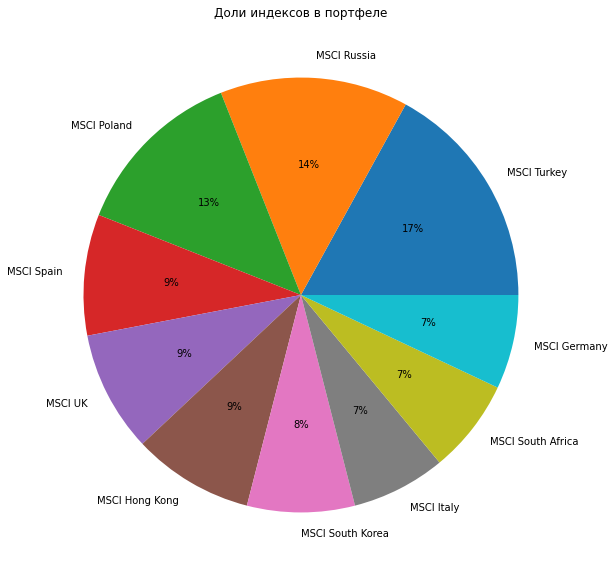

In [78]:
top_10 = aggregated_data.head(10)

fig1, ax = plt.subplots(figsize=(10,10))
plt.title('Доли индексов в портфеле')
ax.pie(top_10['portfolio %'], labels = top_10['RA_Index'], autopct='%1.f%%' )
plt.show()

## Экспорт данных в google drive

Создадим функцию для подготовки данных к отправке в google sheet. Она будет менять float на string с запятой вместо точки

In [ ]:
def prepare_to_google_sheets(df):
  new_df = df.copy()  

  for col in new_df.columns:
    if new_df[col].dtype == 'float64':
      new_df[col] = new_df[col].astype('string')      
      new_df[col] = new_df[col].str.replace('.',',')
  
  return new_df

Обновим данные в  google drive

In [ ]:
google_service = gspread.service_account(filename='underestimated-countries-cb59d0c70a49.json')
google_sheet   = gc.open_by_key('1r3pmRTKgIj2HthrY7f6PG63lWesYYIEeN8Q6XvOd_jI')
worksheet      = google_sheet.get_worksheet(0) #-> 0 - first sheet, 1 - second sheet etc. 

worksheet.clear()

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, prepare_to_google_sheets(aggregated_data)) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET
